In [1]:
# install packages and get data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

demand = pd.read_csv("WoolworthsDemands.csv")
locations = pd.read_csv("WoolworthsLocations.csv")
travelDur = pd.read_csv("WoolworthsTravelDurations.csv")

In [2]:
demand_long = demand.melt(id_vars = 'Store',var_name='Date', value_name='Demand' ) # pivot longer on dates

demand_long.Date = pd.to_datetime(demand_long.Date) # convert dates to datetime format

demand_long['Weekday'] = demand_long.Date.dt.dayofweek # add a day of the week column to the df

# day class is Weekend if the day is in the weekend, weekday otherwise
demand_long = demand_long.assign(DayClass=["Weekend" if day in (5,6) else "Weekday" for day in demand_long.Weekday]) 

demandid = demand.copy()

demandid['id'] = np.floor(np.arange(0,65)/13)

demand_long = demand_long.merge(demandid[["Store", "id"]], on="Store")

In [3]:
import re
demand_long["StoreClass"] = [
        ("Big","Small")[re.search("(FreshChoice|SuperValue|Countdown Metro).*", store) is not None] for store in demand_long.Store
    ] # Class the Freshchoice, countdown metro and Super Value stores as "small" and all other countdowns as "big" using regular expressions


# demand_long[[re.search("(FreshChoice|SuperValue|Countdown Metro).*", store) is not None for store in demand_long.Store]]

small_df = demand_long[demand_long.StoreClass=="Small"][demand_long.DayClass=="Weekday"] # df of all 'small stores' on days they are open
big_wkday_df = demand_long[demand_long.StoreClass=="Big"][demand_long.DayClass=="Weekday"] # df of all 'big stores' on weekdays
big_wkend_df = demand_long[demand_long.StoreClass=="Big"][demand_long.Weekday==5] # df of all 'big stores' on saturdays


<ipython-input-3-a7cb0c47801a>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  small_df = demand_long[demand_long.StoreClass=="Small"][demand_long.DayClass=="Weekday"] # df of all 'small stores' on days they are open
<ipython-input-3-a7cb0c47801a>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  big_wkday_df = demand_long[demand_long.StoreClass=="Big"][demand_long.DayClass=="Weekday"] # df of all 'big stores' on weekdays
<ipython-input-3-a7cb0c47801a>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  big_wkend_df = demand_long[demand_long.StoreClass=="Big"][demand_long.Weekday==5] # df of all 'big stores' on saturdays


4.4125


<AxesSubplot:xlabel='Demand', ylabel='Count'>

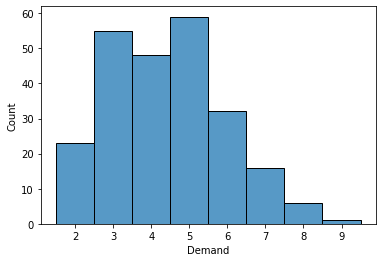

In [4]:
# small_df.Demand.hist(bins=np.arange(0.5,9.5))
print(small_df.Demand.mean())
sns.histplot(small_df.Demand, bins=np.arange(1.5,10.5))

7.986792452830189


<AxesSubplot:xlabel='Demand', ylabel='Count'>

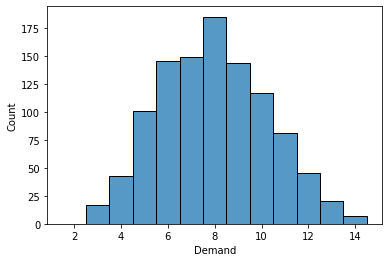

In [5]:
# big_wkday_df.Demand.hist(bins=np.arange(0.5,15.5))
print(big_wkday_df.Demand.mean())
sns.histplot(big_wkday_df.Demand, bins=np.arange(1.5,15.5))

3.8962264150943398


<AxesSubplot:xlabel='Demand', ylabel='Count'>

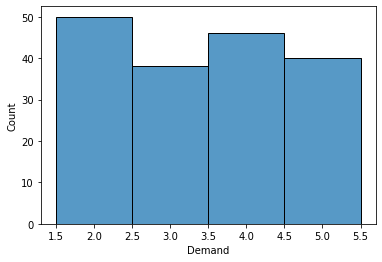

In [6]:
# big_wkend_df.Demand.hist(bins=np.arange(1.5,6.5))
print(big_wkend_df.Demand.mean())

sns.histplot(big_wkend_df.Demand, bins=np.arange(1.5,6.5))


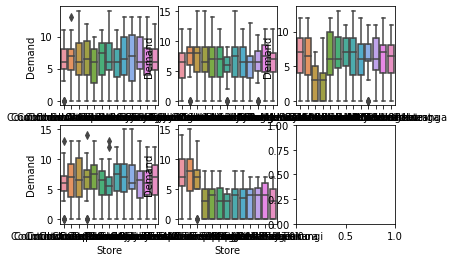

In [8]:
f, ax = plt.subplots(2,3)
axs = ax.ravel()
for i in range(5):
    sns.boxplot(data = demand_long[demand_long.id==i], x="Store", y="Demand", ax=axs[i])

In [ ]:
demand.columns


Index(['Store', '2021-06-14', '2021-06-15', '2021-06-16', '2021-06-17',
       '2021-06-18', '2021-06-19', '2021-06-20', '2021-06-21', '2021-06-22',
       '2021-06-23', '2021-06-24', '2021-06-25', '2021-06-26', '2021-06-27',
       '2021-06-28', '2021-06-29', '2021-06-30', '2021-07-01', '2021-07-02',
       '2021-07-03', '2021-07-04', '2021-07-05', '2021-07-06', '2021-07-07',
       '2021-07-08', '2021-07-09', '2021-07-10', '2021-07-11'],
      dtype='object')

In [ ]:

demand['id'] = np.floor(np.arange(0,65)/13)
# demand.iloc[1:3]



0
1
2
3
4


In [ ]:
demand

,Store,2021-06-14,2021-06-15,2021-06-16,2021-06-17,2021-06-18,2021-06-19,2021-06-20,2021-06-21,2021-06-22,...,2021-07-03,2021-07-04,2021-07-05,2021-07-06,2021-07-07,2021-07-08,2021-07-09,2021-07-10,2021-07-11,id
0,Countdown Airport,5,6,10,11,7,5,0,7,8,...,6,0,8,6,8,9,7,3,0,0.0
1,Countdown Auckland City,6,8,5,8,8,2,0,8,8,...,3,0,11,7,7,9,5,5,0,0.0
2,Countdown Aviemore Drive,9,9,8,7,14,4,0,6,10,...,6,0,7,9,4,6,9,2,0,0.0
3,Countdown Birkenhead,9,4,8,10,7,5,0,5,6,...,6,0,9,9,5,4,12,4,0,0.0
4,Countdown Blockhouse Bay,6,8,7,6,6,2,0,9,4,...,3,0,8,8,4,10,3,2,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,SuperValue Avondale,3,2,6,6,4,0,0,3,8,...,0,0,5,5,5,5,5,0,0,4.0
61,SuperValue Flatbush,6,7,4,3,5,0,0,4,6,...,0,0,5,4,5,4,3,0,0,4.0
62,SuperValue Palomino,4,2,2,6,3,0,0,7,6,...,0,0,5,5,5,7,7,0,0,4.0
63,SuperValue Papakura,4,6,4,5,5,0,0,7,4,...,0,0,6,6,6,3,6,0,0,4.0
